<a href="https://colab.research.google.com/github/rsonar821/Classification-Capstone-Project/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv").drop('id', axis=1)

# **Data understanding and Analysis**

In [4]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [8]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
columns = df.columns
for column in columns:
  print(column,'\n')
  print(df[column].unique())
  print("---"*50)

age 

[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
------------------------------------------------------------------------------------------------------------------------------------------------------
education 

[ 2.  4.  1.  3. nan]
------------------------------------------------------------------------------------------------------------------------------------------------------
sex 

['F' 'M']
------------------------------------------------------------------------------------------------------------------------------------------------------
is_smoking 

['YES' 'NO']
------------------------------------------------------------------------------------------------------------------------------------------------------
cigsPerDay 

[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
----------------------------------------------

In [10]:
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


# **Imputing Missing Data**

In [11]:
df['education'] = df['education'].fillna(df['education'].median())

In [12]:
df[df['cigsPerDay'].isnull()]['is_smoking']=='YES'

422     True
466     True
469     True
491     True
538     True
767     True
1461    True
1467    True
1597    True
1986    True
2031    True
2087    True
2240    True
2284    True
2527    True
2638    True
2648    True
2723    True
2879    True
2945    True
3301    True
3378    True
Name: is_smoking, dtype: bool

cigsPerDay having Nan values show YES for is_smoking so the cigPerDay can't be replaced with the median as it is 0, so replacing it with the mean 

In [13]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())

In [14]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())

BPMeds as median as the median and 75% is 0

In [15]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

Mean is 237.074 and median is 234 so replacing the Nan values with anyone is ok

In [16]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

Mean is 25.794 and median is 25.38 so replacing the Nan values with anyone is ok

In [17]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [18]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [19]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [21]:
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.971681,NaN,NaN,9.069477,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.005925,NaN,NaN,11.840458,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


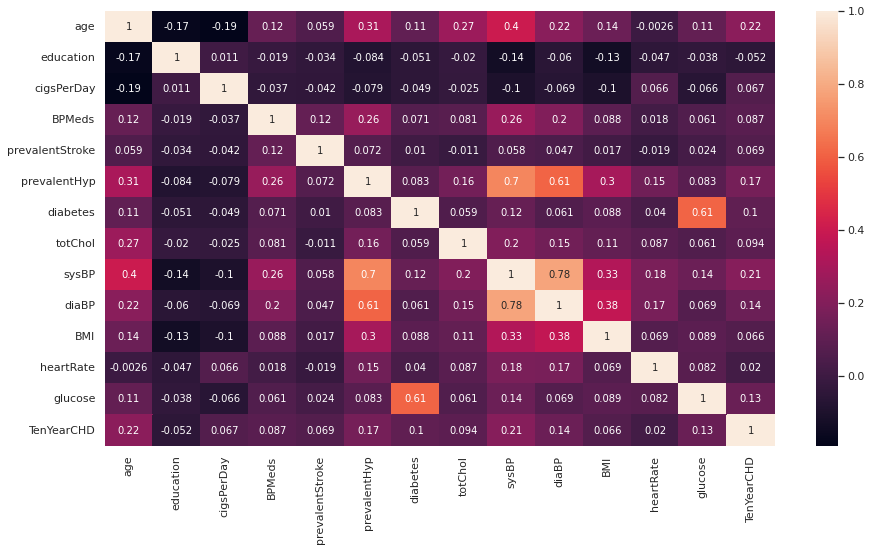

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

# **Distribution of continuous variables**

In [23]:
continuous_variables = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

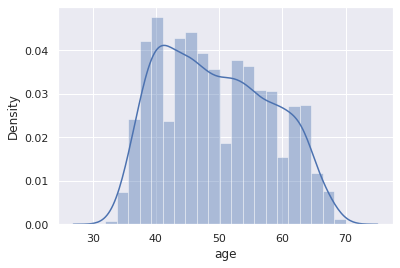

------------------------------------------------------------------------------------------------------------------------------------------------------


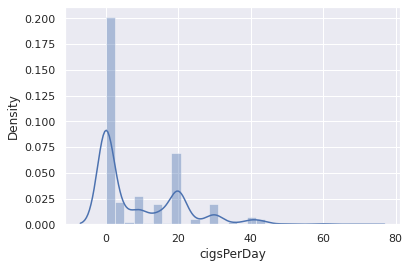

------------------------------------------------------------------------------------------------------------------------------------------------------


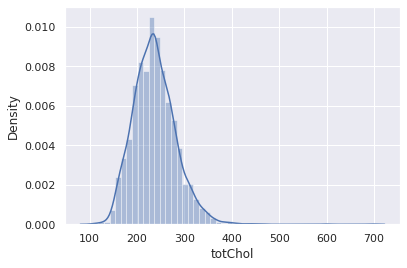

------------------------------------------------------------------------------------------------------------------------------------------------------


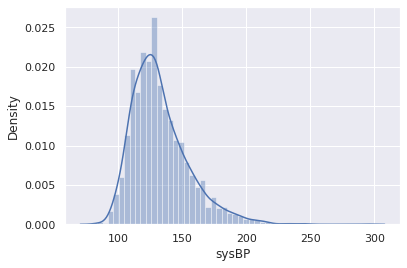

------------------------------------------------------------------------------------------------------------------------------------------------------


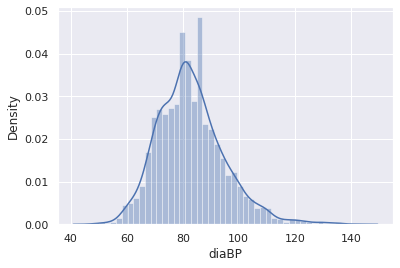

------------------------------------------------------------------------------------------------------------------------------------------------------


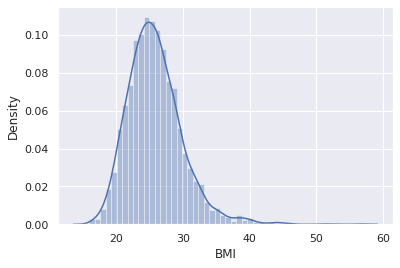

------------------------------------------------------------------------------------------------------------------------------------------------------


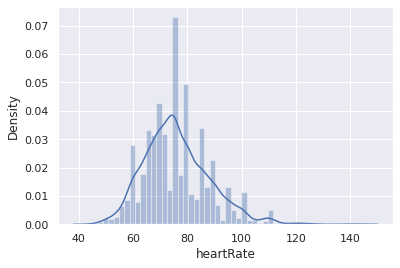

------------------------------------------------------------------------------------------------------------------------------------------------------


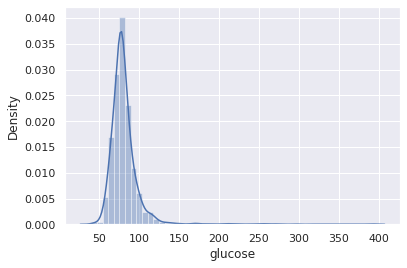

------------------------------------------------------------------------------------------------------------------------------------------------------


In [24]:
for variables in continuous_variables:
  plt.show(sns.distplot(df[variables]))
  print('---'*50)

# **Important Relations between the continuous variables**

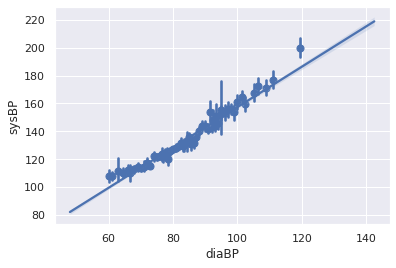

In [25]:
sns.regplot(x=df['diaBP'], y=df['sysBP'], x_bins=100)

One of them i.e, sysBP or diaBP can be used as it shows maximum multi-collinearity and both of them show the same relation with the other independent variables and the dependent variable.

sysBP and diaBP always show a linear relationship according to the studies, so anyone out of the 2 can be neglected for the analysis. 

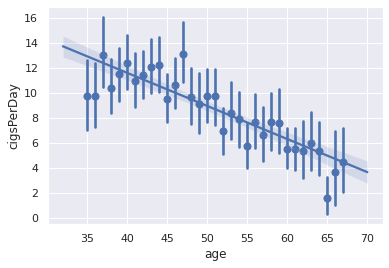

In [26]:
sns.regplot(x=df['age'], y=df['cigsPerDay'], x_bins=100)

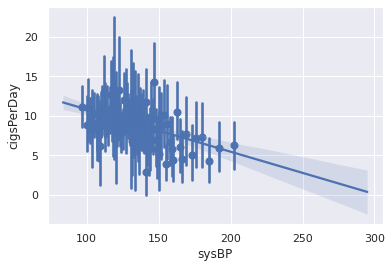

In [27]:
sns.regplot(x=df['sysBP'], y=df['cigsPerDay'], x_bins=100)

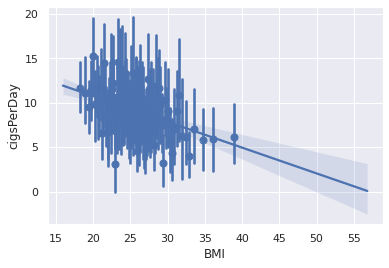

In [28]:
sns.regplot(x=df['BMI'], y=df['cigsPerDay'], x_bins=100)

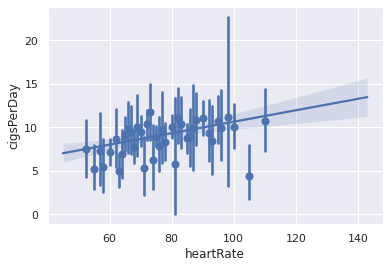

In [29]:
sns.regplot(x=df['heartRate'], y=df['cigsPerDay'], x_bins=100)

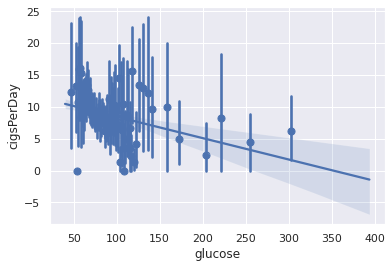

In [30]:
sns.regplot(x=df['glucose'], y=df['cigsPerDay'], x_bins=500)

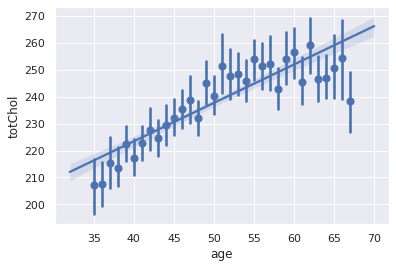

In [31]:
sns.regplot(x=df['age'], y=df['totChol'], x_bins=100)

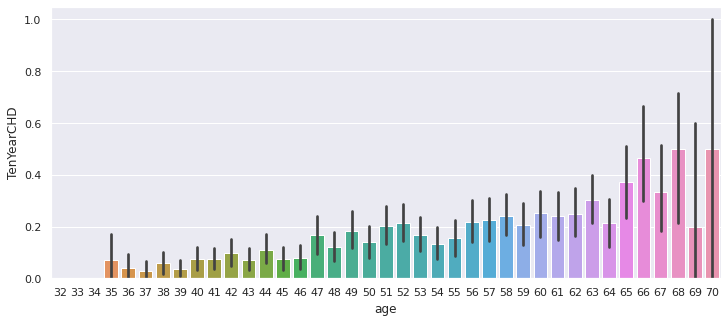

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['age'], y=df['TenYearCHD'])

### **age: is_smoking**

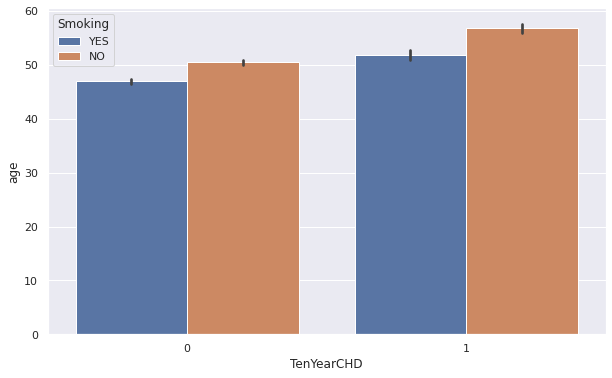

In [33]:
plt.figure(figsize=(10,6))
figure = sns.barplot(x=df['TenYearCHD'], y=df['age'], hue=df['is_smoking'])
plt.legend(title='Smoking')
plt.show(figure)

### **age: sex**

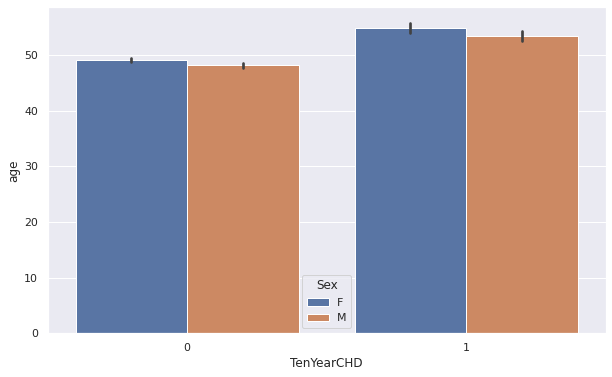

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['TenYearCHD'], y=df['age'], hue=df['sex'])
plt.legend(title='Sex')

### **cigsPerDay: sex**

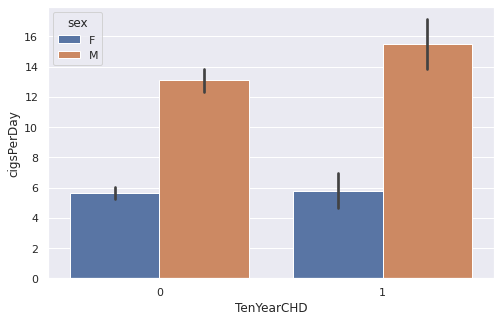

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['cigsPerDay'], hue=df['sex'])

### **cigsPerDay: BPMeds**

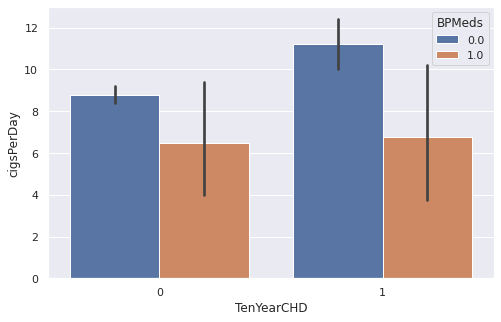

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['cigsPerDay'], hue=df['BPMeds'])

**Healthy Cholestrol Level:** 125 to 200mg/dL

### **totChol: sex**

(210.0, 270.0)

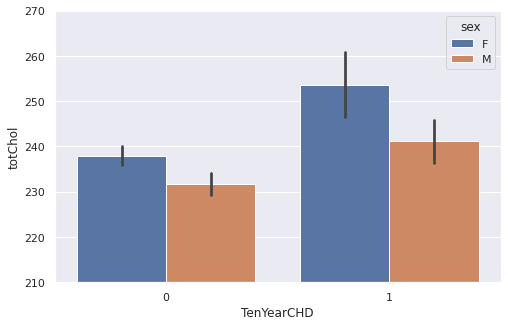

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['sex'])
plt.ylim(210, 270)

### **totChol: is_smoking**

(210.0, 270.0)

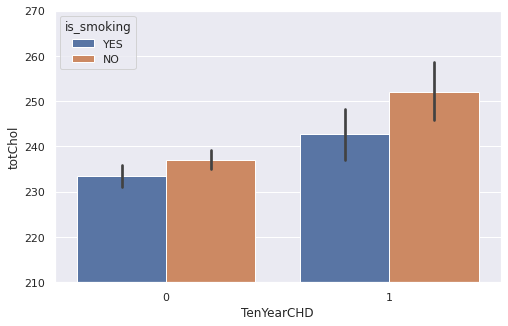

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['is_smoking'])
plt.ylim(210, 270)

### **totChol: diabetes**

(205.0, 270.0)

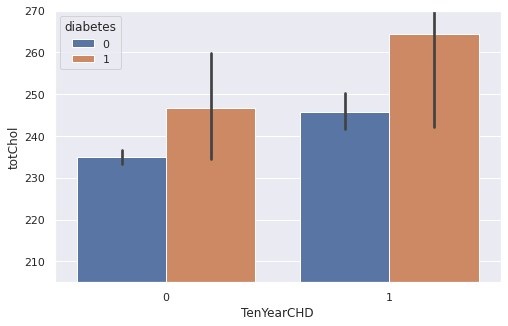

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['totChol'], hue=df['diabetes'])
plt.ylim(205, 270)

**Healthy Systolic Blood Pressure Level:** <120 mm Hg

**Healthy Diastolic Blood Pressure Level:** <80 mm Hg

### **sysBP: is_smoking**

(105.0, 160.0)

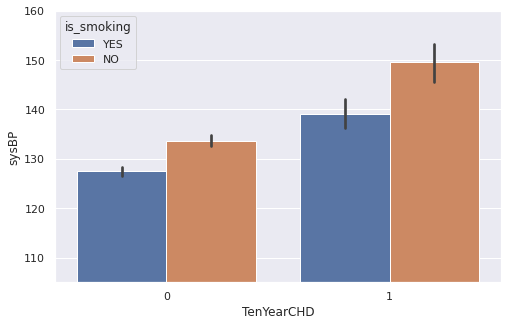

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['is_smoking'])
plt.ylim(105, 160)

### **sysBP: sex**

(105.0, 160.0)

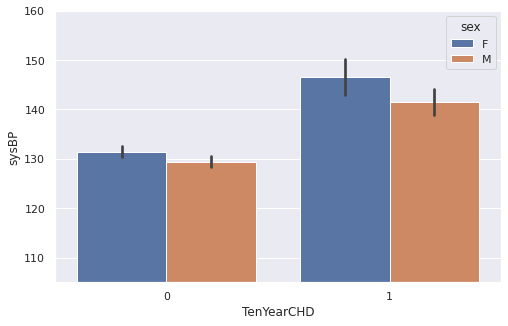

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['sex'])
plt.ylim(105, 160)

### **sysBP: prevalentHyp**

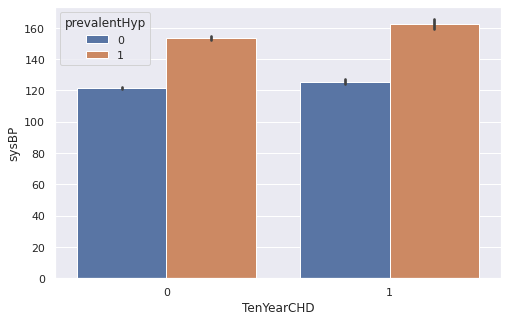

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['TenYearCHD'], y=df['sysBP'], hue=df['prevalentHyp'])
#plt.ylim(105, 160)